# Estimation

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import EstimationMethods as esti
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
from tqdm import tqdm

simplefilter(action='ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
domains = ['music', 'politics', 'health', 'technology']
X_text_dict = dict()
X_user_description_dict = dict()
X_user_covariates_dict = dict()
T_dict = dict()
Y_dict = dict()

for domain in domains:
    with open(f'pickles/encodings/{domain}/X_text_reduced.pkl', 'rb') as f: X_text_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/X_user_description_reduced.pkl', 'rb') as f: X_user_description_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/X_user_covariates.pkl', 'rb') as f: X_user_covariates_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/T.pkl', 'rb') as f: T_dict[domain] = pickle.load(f)
    with open(f'pickles/encodings/{domain}/Y.pkl', 'rb') as f: Y_dict[domain] = pickle.load(f)

## Linear S-Learner and T-Learner

In [3]:
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
domains = ['music', 'politics', 'health', 'technology']
B = 100

s_learner_res = {
    k_domain: {
        k_treatment: {
            'ate': list(),
            'train_mse': list(),
            'test_mse': list()
        } for k_treatment in treatment_pairs
    } for k_domain in domains
}

t_learner_res = {
    k_domain: {
        k_treatment: {
            'ate': list(),
            'train_mse_0': list(),
            'test_mse_0': list(),
            'train_mse_1': list(),
            'test_mse_1': list()
        } for k_treatment in treatment_pairs
    } for k_domain in domains
}


for domain in domains:
    print(domain)
    for (t1, t2) in treatment_pairs:
        print(t1, t2)
        # Linear S-learner
        for b in tqdm(range(B)):
            ate, model, train_mse, test_mse = esti.S_learner(X_text_dict, X_user_description_dict, X_user_covariates_dict, T_dict, Y_dict, 
                                                     t1=t1, t2=t2, domain=domain, model=LinearRegression(), sample_with_replacements=True)
            s_learner_res[domain][(t1, t2)]['ate'].append(ate)
            s_learner_res[domain][(t1, t2)]['train_mse'].append(train_mse)
            s_learner_res[domain][(t1, t2)]['test_mse'].append(test_mse)
        
        # Linear T-learner
        for b in tqdm(range(B)):
            ate, model_0, model_1, train_mse_0, test_mse_0, train_mse_1, test_mse_1 = esti.T_learner(X_text_dict, X_user_description_dict, X_user_covariates_dict, 
                                                                                                     T_dict, Y_dict, t1=t1, t2=t2, domain=domain, 
                                                                                                     model_0=Lasso(), model_1=Lasso(), sample_with_replacements=True)
            t_learner_res[domain][(t1, t2)]['ate'].append(ate)
            t_learner_res[domain][(t1, t2)]['train_mse_0'].append(train_mse_0)
            t_learner_res[domain][(t1, t2)]['test_mse_0'].append(test_mse_0)
            t_learner_res[domain][(t1, t2)]['train_mse_1'].append(train_mse_1)
            t_learner_res[domain][(t1, t2)]['test_mse_1'].append(test_mse_1)

music
0 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.71it/s]


1 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  7.75it/s]


2 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.29it/s]


3 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.70it/s]


politics
0 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 58.57it/s]


1 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 45.55it/s]


2 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 29.80it/s]


3 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.33it/s]


health
0 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.81it/s]


1 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.23it/s]


2 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.62it/s]


3 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:06<00:00, 15.56it/s]


technology
0 1


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.30it/s]


1 2


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.62it/s]


2 3


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.32it/s]


3 0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 14.24it/s]


In [4]:
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
for domain in domains:
    for (t1, t2) in treatment_pairs:
        print(domain)
        print((treatment_names[t2], treatment_names[t1]))
        print()
        print('S-learner')
        print(f'ATE {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["ate"])}')
        print(f'train_mse {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["train_mse"])}')
        print(f'test_mse {esti.bootstrap_confidence_interval(s_learner_res[domain][(t1, t2)]["test_mse"])}')
        print()
        print('T-learner')
        print(f'ATE {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["ate"])}')
        print(f'train_mse_0 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["train_mse_0"])}')
        print(f'test_mse_0 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["test_mse_0"])}')
        print(f'train_mse_1 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["train_mse_1"])}')
        print(f'test_mse_1 {esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["test_mse_1"])}')
        print('------------------------------------------------------------------------------------')
        print('------------------------------------------------------------------------------------')

music
('6-12', '0-6')

S-learner
ATE [-0.2355304115727456, 0.011713479277969929]
train_mse [0.3337931727576779, 0.39802306000167914]
test_mse [2.045980402293889, 3736601.5008291556]

T-learner
ATE [-0.10335110783174278, 0.012556755665029253]
train_mse_0 [0.7924048093442005, 0.9264813450350529]
test_mse_0 [0.6699835208234652, 1.1063316885946854]
train_mse_1 [0.7511093480953148, 0.9366185709987388]
test_mse_1 [0.5435387838528142, 1.1130946360394962]
------------------------------------------------------------------------------------
------------------------------------------------------------------------------------
music
('12-18', '6-12')

S-learner
ATE [-0.12419755572377168, 0.09974057703321855]
train_mse [0.3994860521834657, 0.4761125946331487]
test_mse [1.2997446611288728, 98194494.9242023]

T-learner
ATE [-0.06186971483042884, 0.0657138486819433]
train_mse_0 [0.7408073754596461, 0.9582124549511155]
test_mse_0 [0.551413296090917, 1.1544035506508374]
train_mse_1 [0.7821056519798743, 0

### MSE confidence intervals visualization (T-Learner only)

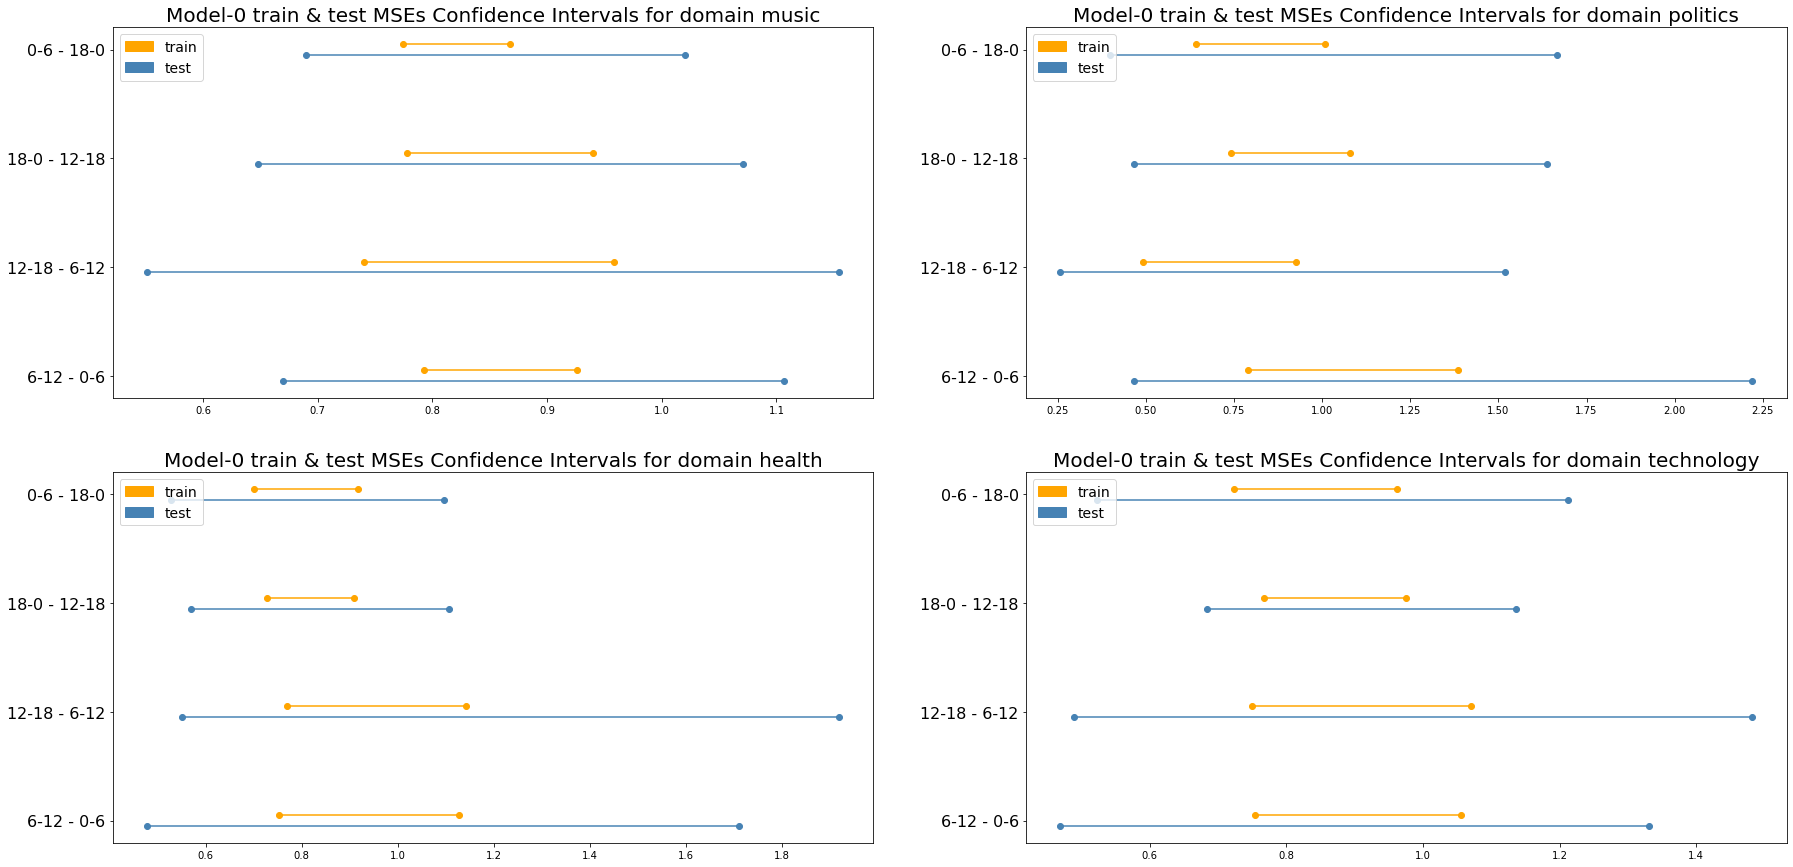

In [5]:
model_Type = 0
eps = 0.05
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
idx = [(0,0), (0,1), (1,0), (1,1)]
fig, ax = plt.subplots(2,2,figsize=(30,15))
train_patch = mpatches.Patch(color='orange', label='train')
test_patch = mpatches.Patch(color='steelblue', label='test')
for k, domain in enumerate(domains):
    i, j = idx[k]
    for t, (t1, t2) in enumerate(treatment_pairs):
        L_train, U_train = esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)][f'train_mse_{model_Type}'])
        L_test, U_test = esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)][f'test_mse_{model_Type}'])
        ax[i, j].plot((L_train ,U_train),(t+eps, t+eps), 'ro-', color='orange', label='train')
        ax[i, j].plot((L_test ,U_test),(t-eps, t-eps), 'ro-', color='steelblue', label='test')
    ax[i, j].legend()
    ax[i, j].set_title(f'Model-{model_Type} train & test MSEs Confidence Intervals for domain {domain}', fontsize=20)
    ax[i, j].set_yticks(range(len(treatment_pairs)), [f'{treatment_names[t2]} - {treatment_names[t1]}' for (t1,t2) in treatment_pairs], fontsize=16)
    ax[i, j].legend(handles=[train_patch, test_patch], fontsize=14, loc=2)

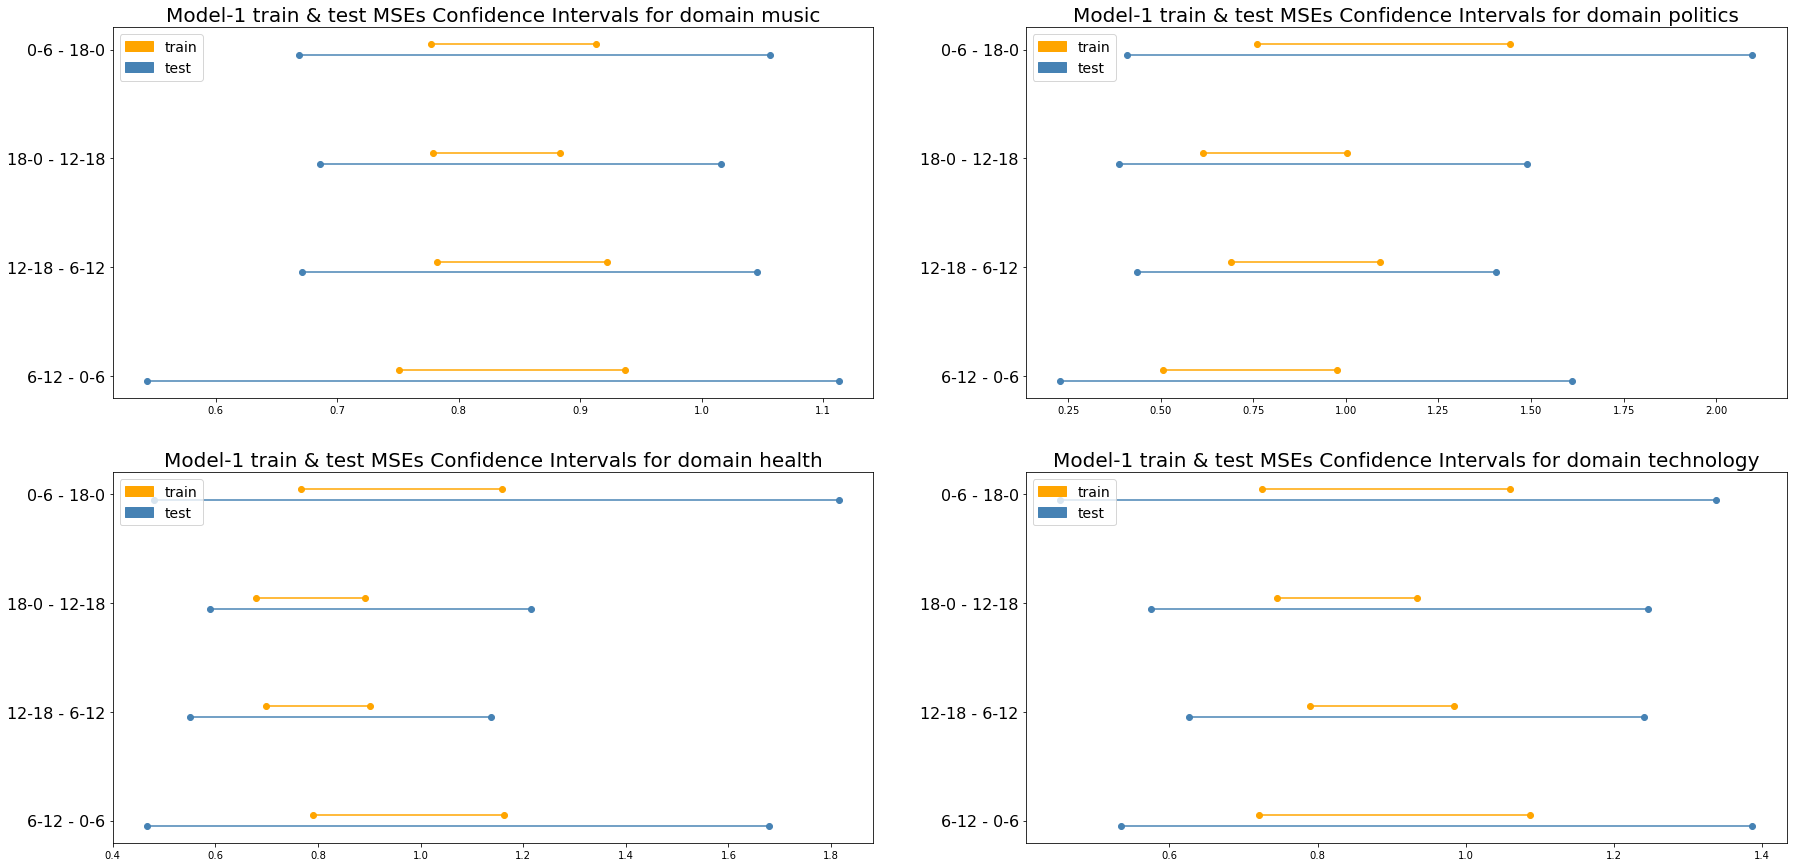

In [6]:
model_Type = 1
eps = 0.05
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
idx = [(0,0), (0,1), (1,0), (1,1)]
fig, ax = plt.subplots(2,2,figsize=(30,15))
train_patch = mpatches.Patch(color='orange', label='train')
test_patch = mpatches.Patch(color='steelblue', label='test')
for k, domain in enumerate(domains):
    i, j = idx[k]
    for t, (t1, t2) in enumerate(treatment_pairs):
        L_train, U_train = esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)][f'train_mse_{model_Type}'])
        L_test, U_test = esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)][f'test_mse_{model_Type}'])
        ax[i, j].plot((L_train ,U_train),(t+eps, t+eps), 'ro-', color='orange', label='train')
        ax[i, j].plot((L_test ,U_test),(t-eps, t-eps), 'ro-', color='steelblue', label='test')
    ax[i, j].legend()
    ax[i, j].set_title(f'Model-{model_Type} train & test MSEs Confidence Intervals for domain {domain}', fontsize=20)
    ax[i, j].set_yticks(range(len(treatment_pairs)), [f'{treatment_names[t2]} - {treatment_names[t1]}' for (t1,t2) in treatment_pairs], fontsize=16)
    ax[i, j].legend(handles=[train_patch, test_patch], fontsize=14, loc=2)

### CATE confidence intervals visualization (T-Learner only)

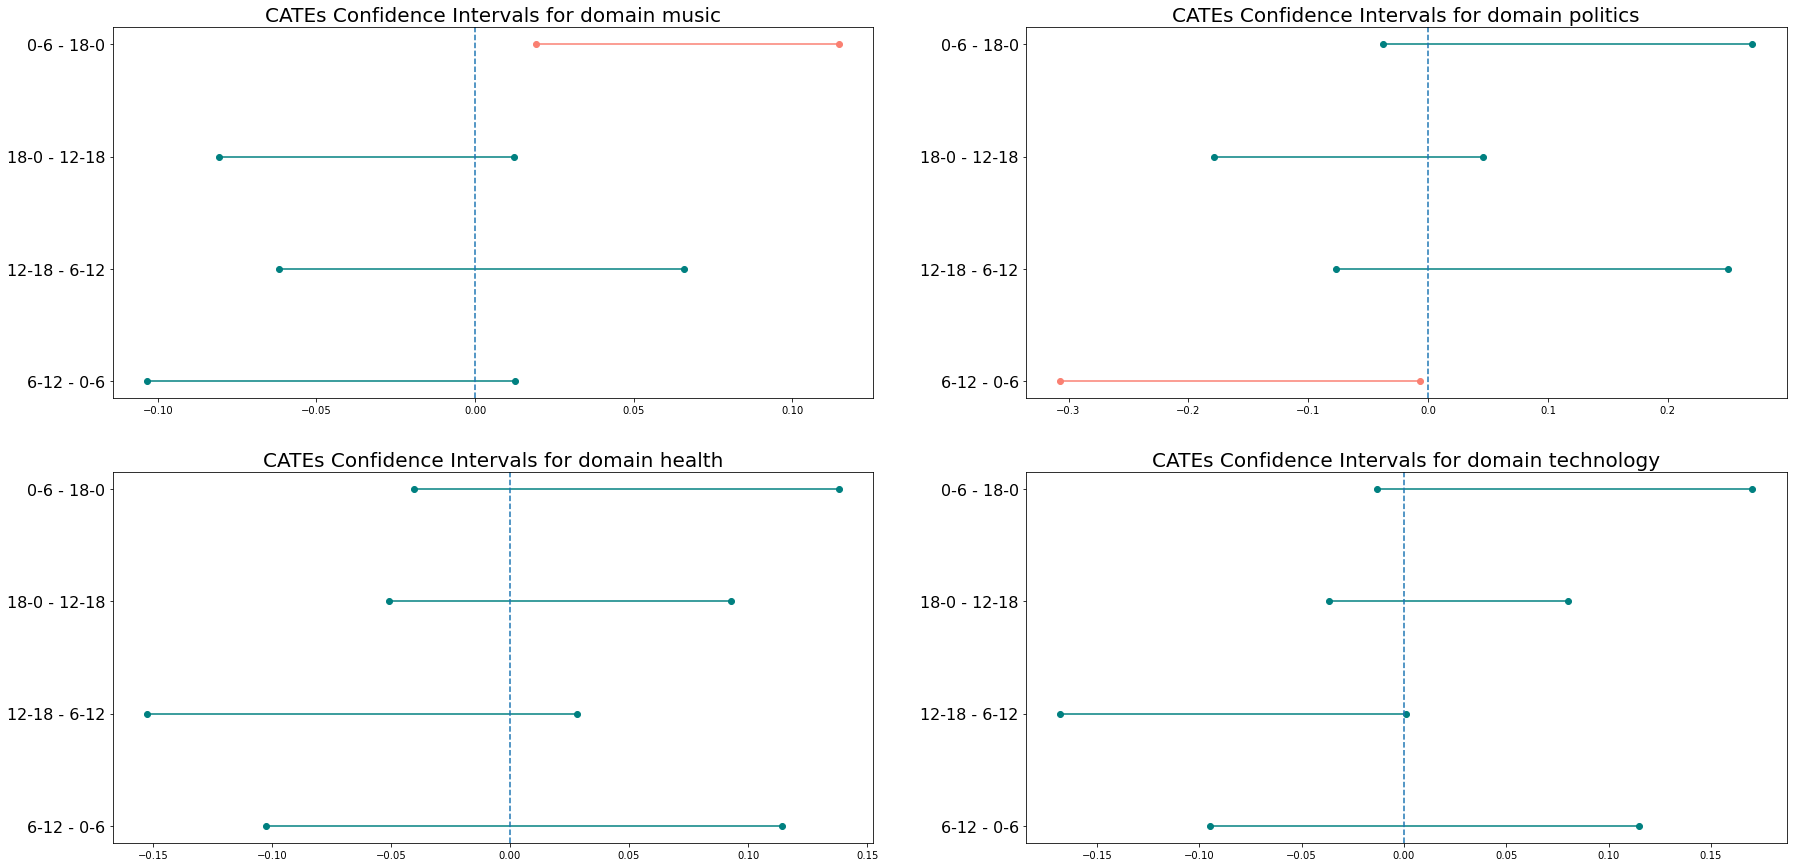

In [7]:
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
idx = [(0,0), (0,1), (1,0), (1,1)]
fig, ax = plt.subplots(2,2,figsize=(30,15))
for k, domain in enumerate(domains):
    i, j = idx[k]
    for t, (t1, t2) in enumerate(treatment_pairs):
        L, U = esti.bootstrap_confidence_interval(t_learner_res[domain][(t1, t2)]["ate"])
        color = 'teal' if (L <=0 and U >= 0) else 'salmon'
        ax[i, j].plot((L ,U),(t, t), 'ro-', color=color)
    ax[i, j].axvline(0, linestyle='--')
    ax[i, j].set_title(f'CATEs Confidence Intervals for domain {domain}', fontsize=20)
    ax[i, j].set_yticks(range(len(treatment_pairs)), [f'{treatment_names[t2]} - {treatment_names[t1]}' for (t1,t2) in treatment_pairs], fontsize=16)

## Linear X-Learner

In [8]:
def plot_feature_importance(model, ax, shapes, title):
    feature_importance = model.coef_
    text_fi = feature_importance[0:shapes['text']]
    user_d_fi = feature_importance[shapes['text']:shapes['text']+shapes['user_d']]
    user_c_fi = feature_importance[shapes['text']+shapes['user_d']:shapes['text']+shapes['user_d']+shapes['user_c']]
    domain_fi = feature_importance[-shapes['domain']:]
    text_fi = np.abs(text_fi).mean()
    user_d_fi = np.abs(user_d_fi).mean()
    user_c_fi = np.abs(user_c_fi).mean()
    domain_fi = np.abs(domain_fi).mean()
    
    ax.bar(['text', 'user description', 'user covariates', 'domain'], [text_fi, user_d_fi, user_c_fi, domain_fi])
    ax.set_title(title)

In [9]:
alpha = 0.01
treatment_pairs = [(0,1), (1,2), (2,3), (3,0)]
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
res_models = dict()
for (t1, t2) in treatment_pairs:
        tau_hat_0, tau_hat_1, f_0, f_1, \
        train_mse_f0, test_mse_f0, train_mse_f1, test_mse_f1, \
        train_mse_tau_hat_0, test_mse_tau_hat_0, train_mse_tau_hat_1, test_mse_tau_hat_1 = esti.X_learner(X_text_dict,
                                                                                                          X_user_description_dict, X_user_covariates_dict, T_dict, Y_dict,
                                                                                                          t1=t1, t2=t2, 
                                                                                                          f_0=Lasso(alpha=alpha), f_1=Lasso(alpha=alpha), 
                                                                                                          tau_hat_0=Lasso(alpha=alpha), tau_hat_1=Lasso(alpha=alpha),
                                                                                                          test_portion=0.1, random_state=42, print_progress=False)
        res_models[(t1, t2)] = (tau_hat_0, tau_hat_1)
        print((treatment_names[t2], treatment_names[t1]))
        print(f'{train_mse_f0=}')
        print(f'{test_mse_f0=}')
        print(f'{train_mse_f1=}')
        print(f'{train_mse_f0=}')
        print(f'{train_mse_tau_hat_0=}')
        print(f'{test_mse_tau_hat_0=}')
        print(f'{train_mse_tau_hat_1=}')
        print(f'{test_mse_tau_hat_1=}')
        print()

('6-12', '0-6')
train_mse_f0=0.8626069314273296
test_mse_f0=0.8664129724210088
train_mse_f1=0.8163940166040827
train_mse_f0=0.8626069314273296
train_mse_tau_hat_0=0.8655388924084277
test_mse_tau_hat_0=0.8621271137542315
train_mse_tau_hat_1=0.8175758015584301
test_mse_tau_hat_1=0.9495394260483085

('12-18', '6-12')
train_mse_f0=0.8163619980907525
test_mse_f0=0.9344140694283317
train_mse_f1=0.8383008001514691
train_mse_f0=0.8163619980907525
train_mse_tau_hat_0=0.8164142192163926
test_mse_tau_hat_0=0.9376602998474689
train_mse_tau_hat_1=0.8428386063424634
test_mse_tau_hat_1=0.9105193319743974

('18-0', '12-18')
train_mse_f0=0.838292442165652
test_mse_f0=0.9009767190076375
train_mse_f1=0.8013395949550842
train_mse_f0=0.838292442165652
train_mse_tau_hat_0=0.8393717403721422
test_mse_tau_hat_0=0.9050587408094956
train_mse_tau_hat_1=0.8017177921570887
test_mse_tau_hat_1=0.9146960135573594

('0-6', '18-0')
train_mse_f0=0.8013334484826664
test_mse_f0=0.9121784923673059
train_mse_f1=0.8624166430

In [10]:
print(sum(np.abs(f_0.coef_)))
print(sum(np.abs(f_1.coef_)))
print(sum(np.abs(tau_hat_0.coef_)))
print(sum(np.abs(tau_hat_1.coef_)))

0.37226086534375297
1.0914723533695248
0.858936375565745
1.274091786354208


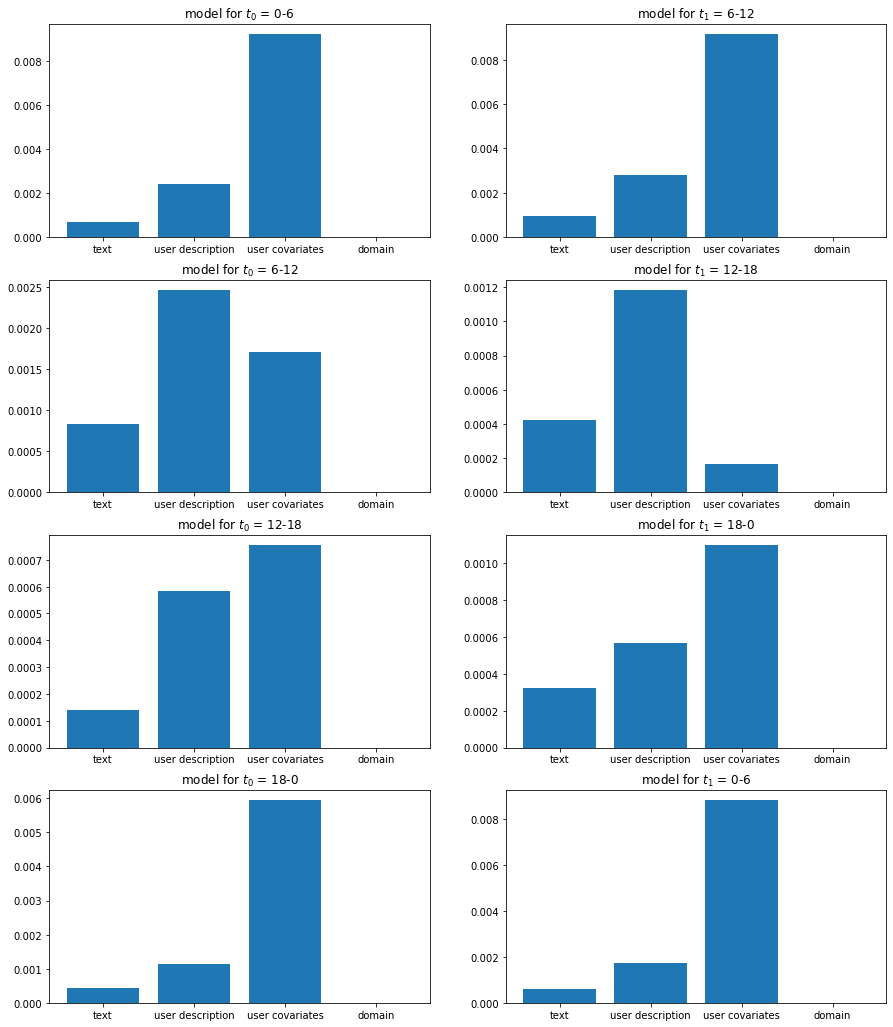

In [11]:
text_shape = X_text_dict['music'].shape[1]
user_d_shape = X_user_description_dict['music'].shape[1]
user_c_shape = X_user_covariates_dict['music'].shape[1]
domain_shape = len(domains)
feature_shapes = dict(text=text_shape, user_d=user_d_shape, user_c=user_c_shape, domain=domain_shape)
treatment_names = ['0-6', '6-12', '12-18', '18-0', '0-6']
fig, ax = plt.subplots(4,2,figsize=(15,18))
for row_idx, (t1, t2) in enumerate(treatment_pairs):
    tau_hat_0, tau_hat_1 = res_models[(t1, t2)]
    plot_feature_importance(tau_hat_0, ax[row_idx, 0], feature_shapes, title=f'model for $t_0$ = {treatment_names[t1]}')
    plot_feature_importance(tau_hat_1, ax[row_idx, 1], feature_shapes, title=f'model for $t_1$ = {treatment_names[t2]}')